<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Clustering_Jer%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico

## Preparación de ambiente

In [1]:
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

cf.go_offline()

In [ ]:
PCA?

## Dataset

### Carga de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Wholesale customers data.csv')

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df["Channel"].value_counts(True)

1    0.677273
2    0.322727
Name: Channel, dtype: float64

In [ ]:
df["Region"].value_counts(True)

3    0.718182
1    0.175000
2    0.106818
Name: Region, dtype: float64

In [ ]:
ls_disc = ["Channel", "Region"]
ls_cont = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

### EDA

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
for feat in ls_disc:
    display(df[feat].value_counts(True).reset_index())

,index,Channel
0,1,0.677273
1,2,0.322727


,index,Region
0,3,0.718182
1,1,0.175000
2,2,0.106818


In [ ]:
df[ls_cont].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
for col in ls_cont:
    df[col].iplot(kind="hist", title=col)

In [ ]:
X = df[ls_cont]

In [ ]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


#### Escalado

In [ ]:
scaler = MinMaxScaler()

In [ ]:
Xs = scaler.fit_transform(X)

In [ ]:
Xs

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

#### Reducción de dimensiones

In [ ]:
X.shape

(440, 6)

In [ ]:
mds = MDS(n_components=2, n_jobs=-1)

In [ ]:
Xm = pd.DataFrame(columns=["d1", "d2"], data=mds.fit_transform(Xs))

In [ ]:
Xm

,d1,d2
0,-0.032303,-0.013627
1,-0.027338,-0.061478
2,0.023259,-0.155749
3,0.094204,0.072124
4,-0.044656,0.100893
...,...,...
435,-0.181412,0.189170
436,-0.001125,0.267257
437,-0.369421,-0.168981
438,0.092370,0.018269


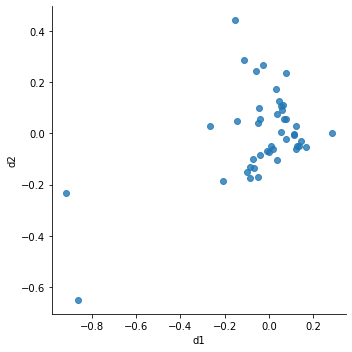

In [ ]:
sns.lmplot(data=Xm.sample(frac=0.1),x='d1',y='d2',fit_reg=False)

## Modelado

### Dendogramas

#### Average

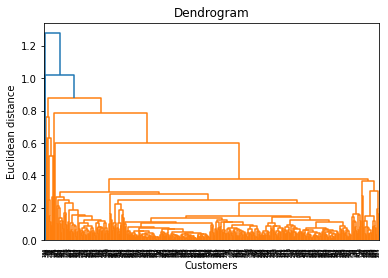

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(Xs, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

#### Centroide

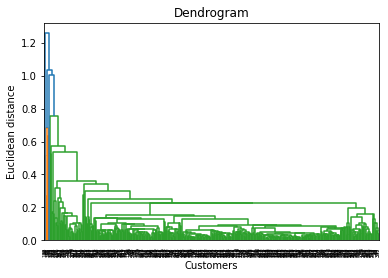

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(Xs, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

#### Método de Ward

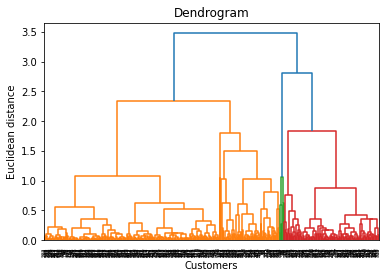

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(Xs, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

### Clustering aglomerativo

In [ ]:
AgglomerativeClustering?

In [ ]:
cluster = AgglomerativeClustering(linkage='ward', n_clusters=4)

In [ ]:
cluster.fit(Xs)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [ ]:
cluster.predict

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [ ]:
cluster.fit_predict(Xs)

array([3, 0, 0, 1, 1, 3, 3, 0, 0, 0, 0, 3, 1, 1, 1, 3, 0, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 3, 2, 0, 0, 3, 0,
       0, 1, 3, 3, 1, 1, 3, 1, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 1, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 0, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 1, 3, 3, 3, 0, 0, 0, 1, 3, 3, 0, 3, 1, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 1, 1, 3, 3, 0, 1, 1, 3, 3, 3, 0,
       0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 1, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3,

In [ ]:
df["cl"] = cluster.fit_predict(Xs)

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cl
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,3


### Análisis de resultados

In [ ]:
df["cl"].value_counts().iplot(kind="bar")

In [ ]:
df[["cl"] + ls_cont].groupby("cl").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cl,,,,,,
0,4586.992000,9473.952000,15214.344000,1421.272,6920.05600,1471.944000
1,28713.075000,6841.262500,6682.662500,8477.525,1169.46250,3184.675000
2,25603.000000,43460.600000,61472.200000,2636.000,29974.20000,2708.800000
3,9920.417391,2615.256522,3281.717391,2098.300,693.13913,950.573913


In [ ]:
Xm["cl"] = df["cl"]

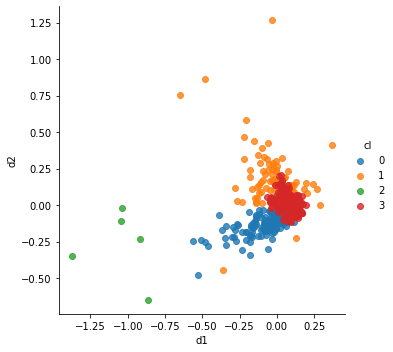

In [ ]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False, hue="cl")